In [1]:
from sports_3d.human_estimation.utils import load_sam_3d_body, visualize_sample_together, setup_sam_3d_body
import cv2
import numpy as np

device = "cpu"
model_path = '/Users/derek/.cache/huggingface/hub/models--facebook--sam-3d-body-dinov3/snapshots/11aaa346c7204874a1cbafe3d39a979080b2c55a/model.ckpt'
mhr_path = '/Users/derek/.cache/huggingface/hub/models--facebook--sam-3d-body-dinov3/snapshots/11aaa346c7204874a1cbafe3d39a979080b2c55a/assets/mhr_model.pt'

estimator = setup_sam_3d_body(
    hf_repo_id="facebook/sam-3d-body-dinov3",
    device="cpu"
)

/Users/derek/Desktop/sports_3d/external/sam-3d-body/sam_3d_body/models/heads/mhr_head.py:33: UserWarning: Momentum is not enabled
  warnings.warn("Momentum is not enabled")


Loading SAM 3D Body model from facebook/sam-3d-body-dinov3...


/Users/derek/Desktop/sports_3d/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 59578.18it/s]


KWARGS {'device': 'cpu'}
Loading SAM 3D Body model...


Using cache found in /Users/derek/.cache/torch/hub/facebookresearch_dinov3_main
Ignored kwargs: {'drop_path': 0.1}
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.encoder.mask_token, head_pose.hand_pose_comps_ori, head_pose.mhr.face_expressions_model.shape_vectors, head_pose.mhr.pose_correctives_model.pose_dirs_predictor.0.sparse_indices, head_pose.mhr.pose_correctives_model.pose_dirs_predictor.0.sparse_weight, head_pose.mhr.pose_correctives_model.pose_dirs_predictor.2.weight, head_pose.mhr.character_torch.skeleton.joint_translation_offsets, head_pose.mhr.character_torch.skeleton.joint_prerotations, head_pose.mhr.character_torch.skeleton.pmi, head_pose.mhr.character_torch.skeleton.joint_parents, head_pose.mhr.character_torch.mesh.rest_vertices, head_pose.mhr.character_torch.mesh.faces, head_pose.mhr.character_torch.mesh.texcoords, head_pose.mhr.character_torch.mesh.texcoord_faces, head_pose.mhr.character_torch.parameter_transform.parame

Loading human detector from vitdet...
########### Using human detector: ViTDet...


/Users/derek/Desktop/sports_3d/.venv/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading FOV estimator from moge2...
########### Using fov estimator: MoGe2...
Mask-condition inference is not supported...
Setup complete!
  Human detector: ✓
  Human segmentor: ✗ (mask inference disabled)
  FOV estimator: ✓


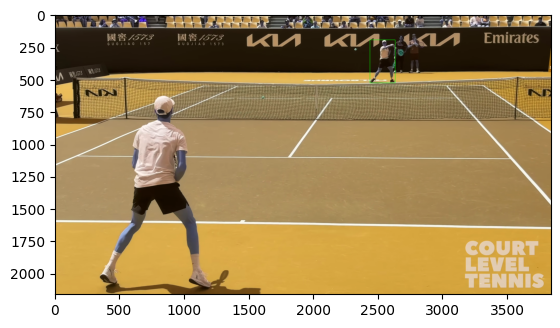

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from sports_3d.visualization.utils import plot_bbox

img_bgr = cv2.imread("/Users/derek/Desktop/sports_3d/data/sinner_ruud_frames/frame_004140_t69.000s.png")
box1 = np.array([3.41126160e+02, 6.23878296e+02, 1.21459619e+03, 2.11426514e+03])
box2 = np.array([2.43352441e+03, 1.99211868e+02, 2.62849878e+03, 5.31113159e+02])

output = plot_bbox(img_bgr, box2)
plt.imshow(output)

In [8]:
# Load and process image
bboxes = np.array([
    [3.41126160e+02, 6.23878296e+02, 1.21459619e+03, 2.11426514e+03],
    [2.43352441e+03, 1.99211868e+02, 2.62849878e+03, 5.31113159e+02]
])

outputs = estimator.process_one_image(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

NameError: name 'estimator' is not defined

In [ ]:
# save the outputs for quick loading
import pickle
with open('outputs.pkl', 'wb') as f:
    pickle.dump(outputs, f)

In [4]:
outputs

[{'bbox': array([ 44.969585,  21.462532, 293.0423  , 390.18405 ], dtype=float32),
  'focal_length': np.float32(901.302),
  'pred_keypoints_3d': array([[-1.09639531e-02, -1.58976543e+00,  3.24273318e-01],
         [-4.39713784e-02, -1.61567140e+00,  2.79717892e-01],
         [ 2.16512121e-02, -1.61862946e+00,  2.81567425e-01],
         [-8.46044868e-02, -1.56439090e+00,  1.90988407e-01],
         [ 6.99228644e-02, -1.56980574e+00,  1.95595145e-01],
         [-1.91823840e-01, -1.37094223e+00,  1.33680269e-01],
         [ 1.80311635e-01, -1.35374486e+00,  1.66359633e-01],
         [-2.09395826e-01, -1.07457805e+00,  1.24703892e-01],
         [ 2.33304515e-01, -1.06217933e+00,  1.53586119e-01],
         [-8.29530060e-02, -9.05408680e-01,  4.86992719e-03],
         [ 8.27699304e-02, -9.05161798e-01,  6.69509452e-03],
         [-3.09702307e-01, -6.35584772e-01,  2.87314057e-01],
         [ 3.40639800e-01, -5.72530508e-01,  1.70568064e-01],
         [-3.03579032e-01, -2.28421926e-01,  1.58561